<a href="https://colab.research.google.com/github/Hrithik2212/Restaurent-Review-Analysis-NLP/blob/main/Restaurent_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restaurent Review Classification (Sentiment Analysis)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re 

## Data Wrangling and Exploration

In [ ]:
data = pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


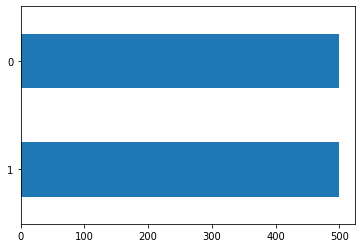

In [ ]:
m = data.Liked.value_counts()
m.plot(kind = 'barh')

## Data Preprocessing

In [ ]:
import tensorflow as tf
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# Remove not from stopwords
ps = PorterStemmer()
all_stopwords = stopwords.words("english")
all_stopwords.remove("not")
data['Review'] = [x.lower() for x in data['Review']]
data['Review'] = [re.sub('[^a-zA-Z]',' ',y) for y in data['Review']]
data['Review'] = [x.split() for x in data['Review']]
data['Review'] = [[ps.stem(word) for word in review] for review in data['Review']]
data['Review'] = [' '.join(x) for x in data['Review']]
data['Review'] = data['Review'].apply(lambda x: 
                                      " ".join(x for x in str(x).split() if x not in all_stopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in data['Review']])/len(data))

6

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train , X_test , y_train , y_test = tts(data['Review'],data['Liked'],test_size=0.2)
len(X_train) , len(y_train) , len(X_test) , len(y_test) 

(800, 800, 200, 200)

## Modelling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


model = Pipeline([
                    ("tfidf", TfidfVectorizer()), 
                    ("Bayes_Classifier", MultinomialNB()) # model the text
])




In [ ]:
model.fit(X_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Bayes_Classifier', MultinomialNB())])

In [ ]:
y_pred = model.predict(X_test)

## Validation

In [ ]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.81      0.82      0.81       101

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



Text(0.5, 1.0, 'Confusion_Matrix')

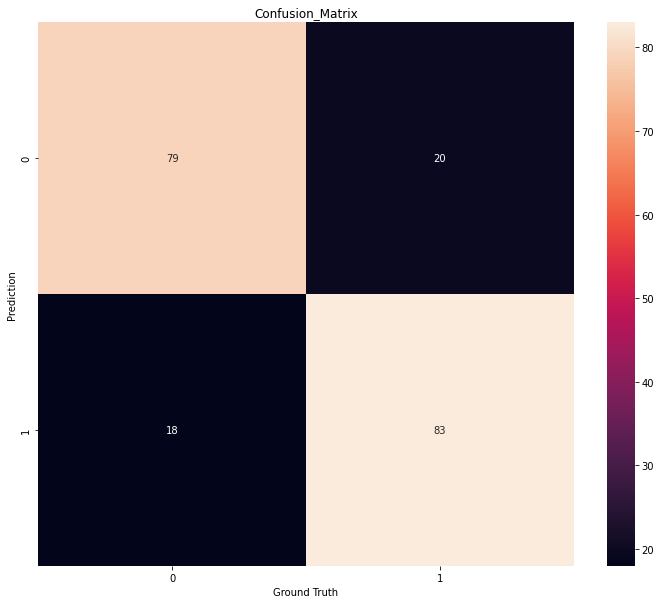

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(cm(y_test,y_pred),annot=True)
plt.ylabel("Prediction")
plt.xlabel("Ground Truth")
plt.title("Confusion_Matrix")